In [1]:
import warnings
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 as cv

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import image_dataset_from_directory, load_img, plot_model

In [5]:
from keras.applications.vgg16 import VGG16

In [6]:
train_path = "/kaggle/input/cifar10/cifar10/train"
test_path = "/kaggle/input/cifar10/cifar10/test"

In [7]:
classes = os.listdir(train_path)

In [8]:
classes

['airplane',
 'horse',
 'truck',
 'automobile',
 'ship',
 'dog',
 'bird',
 'frog',
 'cat',
 'deer']

In [9]:
airplane_path = '/kaggle/input/cifar10/cifar10/train/airplane/10008_airplane.png'
air_img = cv.imread(airplane_path)

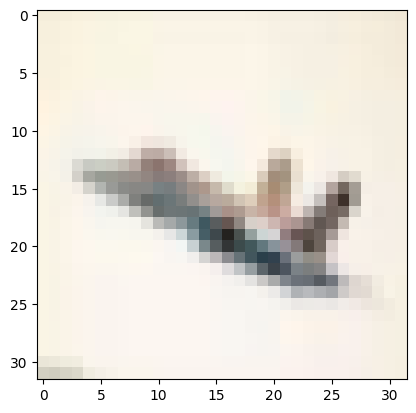

In [10]:
plt.imshow(air_img)

In [11]:
train_ds = image_dataset_from_directory(directory=train_path, 
                                        labels='inferred', 
                                        label_mode='int',
                                        validation_split=0.25,
                                        subset='training',
                                        batch_size=32,
                                        seed=121,
                                        shuffle=True,
                                        image_size=(224, 224))
                                   
    
val_ds = image_dataset_from_directory(directory=train_path, 
                                        labels='inferred', 
                                        label_mode='int', 
                                        validation_split=0.25,
                                        subset='validation',
                                        batch_size=32,
                                        shuffle=True,
                                        seed=123,
                                        image_size=(224, 224))


test_ds = image_dataset_from_directory(directory=test_path, 
                                        labels='inferred', 
                                        label_mode='int', 
                                        batch_size=32,
                                        image_size=(224, 224))
                                   

Found 50000 files belonging to 10 classes.
Using 37500 files for training.
Found 50000 files belonging to 10 classes.
Using 12500 files for validation.
Found 10000 files belonging to 10 classes.


In [12]:
train_ds.class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [13]:
val_ds.class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [14]:
test_ds.class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [15]:
def process(image, label):
    image = tf.cast(image/255.0, tf.float32)
    return image, label

In [16]:
train_data = train_ds.map(process)
val_data = val_ds.map(process)
test_data = test_ds.map(process)

In [17]:
train_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
MyModel = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [19]:
MyModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
MyModel.trainable = False

In [21]:
MyModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
model = Sequential()

model.add(MyModel)
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                        

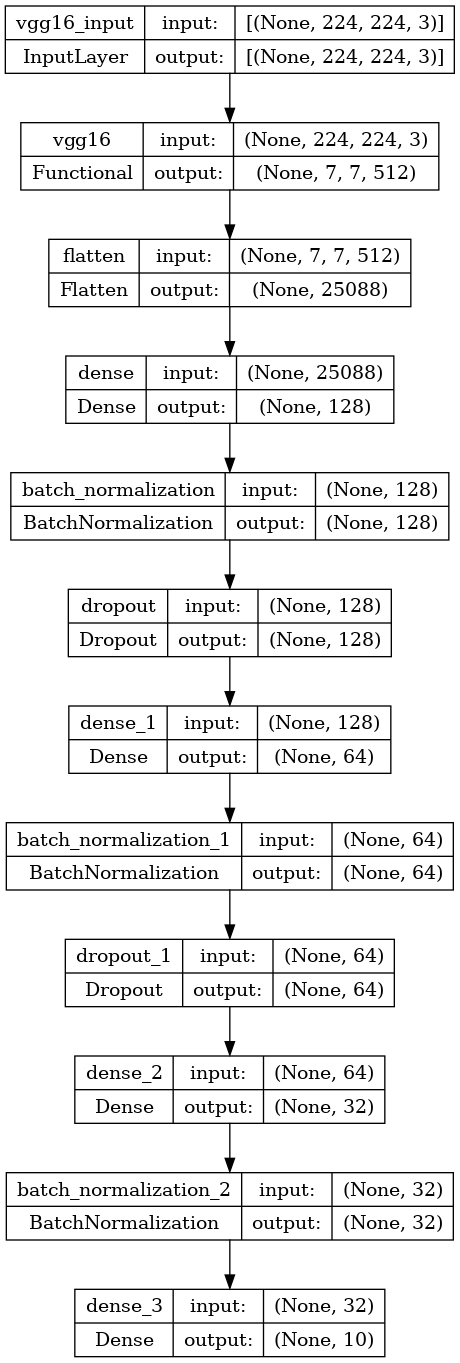

In [24]:
plot_model(model, show_shapes=True)

In [25]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [26]:
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
calls = EarlyStopping(patience=10, verbose=True)

In [28]:
result = model.fit(train_ds, validation_data = val_ds, epochs=100, callbacks=calls, verbose=True, validation_split=0.25)

Epoch 1/100
1172/1172 [==============================] - 227s 182ms/step - loss: 0.7548 - accuracy: 0.7447 - val_loss: 0.8061 - val_accuracy: 0.8406
Epoch 2/100
1172/1172 [==============================] - 222s 189ms/step - loss: 0.4426 - accuracy: 0.8524 - val_loss: 0.5165 - val_accuracy: 0.8911
Epoch 3/100
1172/1172 [==============================] - 220s 187ms/step - loss: 0.3287 - accuracy: 0.8902 - val_loss: 0.3715 - val_accuracy: 0.9179
Epoch 4/100
1172/1172 [==============================] - 222s 189ms/step - loss: 0.2628 - accuracy: 0.9115 - val_loss: 0.3186 - val_accuracy: 0.9301
Epoch 5/100
1172/1172 [==============================] - 222s 189ms/step - loss: 0.2216 - accuracy: 0.9239 - val_loss: 0.2850 - val_accuracy: 0.9384
Epoch 6/100
1172/1172 [==============================] - 222s 189ms/step - loss: 0.1810 - accuracy: 0.9384 - val_loss: 0.3143 - val_accuracy: 0.9428
Epoch 7/100
1172/1172 [==============================] - 222s 189ms/step - loss: 0.1557 - accuracy: 0.9468

In [29]:
pred = model.predict(test_ds).argmax(axis = 1)

313/313 [==============================] - 48s 148ms/step


In [30]:
len(pred)

10000

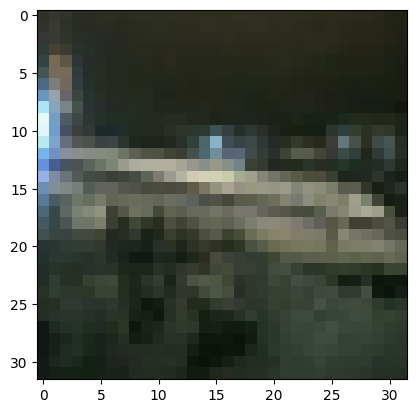

In [31]:
path = "/kaggle/input/cifar10/cifar10/test/airplane/1001_airplane.png"
airplane = cv.imread(path)
plt.imshow(airplane)

In [32]:
airplane = cv.resize(airplane, (224,224))
get_airplane = airplane.reshape((1,224,224,3))

In [33]:
result1 = model.predict(get_airplane).argmax(axis = 1)
if result1 == test_ds.class_names.index('airplane'):
    print('Perfect')
else:
    print('Work Hard')

1/1 [==============================] - 1s 773ms/step
Perfect


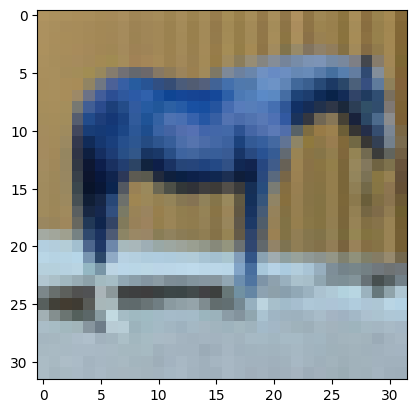

In [34]:
path = "/kaggle/input/cifar10/cifar10/test/horse/1037_horse.png"
horse = cv.imread(path)
plt.imshow(horse)

In [35]:
horse = cv.resize(horse, (224,224))
get_horse = horse.reshape((1,224,224,3))

In [36]:
result2 = model.predict(get_horse).argmax(axis = 1)
if result2 == test_ds.class_names.index('horse'):
    print('Perfect')
else:
    print('Work Hard')

1/1 [==============================] - 0s 26ms/step
Perfect


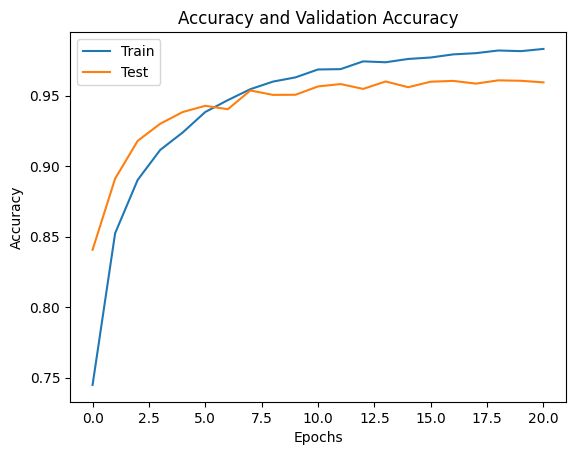

In [37]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Accuracy and Validation Accuracy')
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

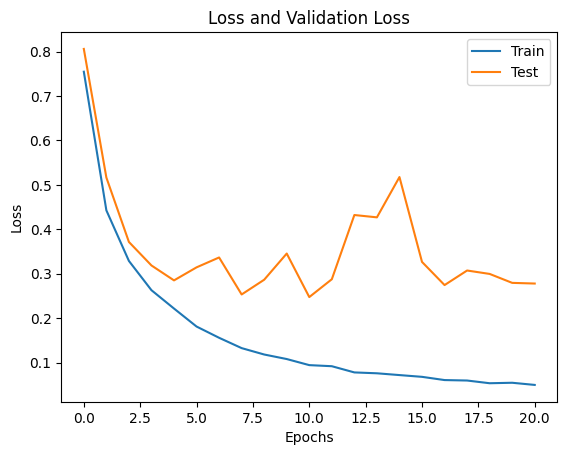

In [38]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Loss and Validation Loss')
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()